In [1]:
#Notebook for calculation of dynamic fuel consumption from sum of totals each day.



In [2]:
import pandas as pd
import sklearn as sk
import time
import numpy as np
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
import matplotlib.pyplot as plt
#%pylab inline
#%%

t1 = time.time()
print('Loading database ...')
df = pd.read_hdf('../database/all_data_comp.h5','table')
print('Time to load database:', time.time()-t1)
#%%

# Variable names.
import var_names
d = var_names.d

Loading database ...
Time to load database: 4.2191832065582275


In [3]:

features =  ['rpm',
             'frp',
             'exh_T',
             'TC_rpm']

feat = pd.read_excel('training_setup.xlsx',index_col='test_no')

# Create a list of features for each test. A list which will contain a list of features for each row. This list
# will be used for the training.

test_features = list()


for i in range(30):
    
    tmp_l = list()
    
    if feat.iloc[i][0] == 1:
        #print('ett')
        for j in range(1,5):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        
    elif feat.iloc[i][0] == 2:
        #print('två')
        for j in range(1,5):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        for j in range(5,9):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        
    elif feat.iloc[i][0] == 3:
        for j in range(1,5):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        for j in range(5,9):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        for j in range(9,13):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        
    elif feat.iloc[i][0] == 4:
        for j in range(1,5):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        for j in range(5,9):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        for j in range(9,13):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        for j in range(13,17):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
    
    test_features.append(tmp_l)

# And then at last add the corresponding predictor to each test set.


for i in range(len(test_features)):
    if 'AE1' in test_features[i][0]:
        test_features[i].append(d['fo_booster_13'])
    if 'AE2' in test_features[i][0]:
        test_features[i].append(d['fo_booster_24'])


Test: 1 ae1_rpm
Test: 1 ae3_rpm
Test: 1 me1_rpm
Test: 1 me3_rpm
Test: 2 ae1_frp
Test: 2 ae3_frp
Test: 2 me1_frp
Test: 2 me3_frp
Test: 3 ae1_exh_T
Test: 3 ae3_exh_T
Test: 3 me1_exh_T
Test: 3 me3_exh_T
Test: 4 ae1_TC_rpm
Test: 4 ae3_TC_rpm
Test: 4 me1_TC_rpm
Test: 4 me3_TC_rpm
Test: 5 ae1_rpm
Test: 5 ae3_rpm
Test: 5 me1_rpm
Test: 5 me3_rpm
Test: 5 ae1_frp
Test: 5 ae3_frp
Test: 5 me1_frp
Test: 5 me3_frp
Test: 6 ae1_rpm
Test: 6 ae3_rpm
Test: 6 me1_rpm
Test: 6 me3_rpm
Test: 6 ae1_exh_T
Test: 6 ae3_exh_T
Test: 6 me1_exh_T
Test: 6 me3_exh_T
Test: 7 ae1_rpm
Test: 7 ae3_rpm
Test: 7 me1_rpm
Test: 7 me3_rpm
Test: 7 ae1_TC_rpm
Test: 7 ae3_TC_rpm
Test: 7 me1_TC_rpm
Test: 7 me3_TC_rpm
Test: 8 ae1_frp
Test: 8 ae3_frp
Test: 8 me1_frp
Test: 8 me3_frp
Test: 8 ae1_exh_T
Test: 8 ae3_exh_T
Test: 8 me1_exh_T
Test: 8 me3_exh_T
Test: 9 ae1_frp
Test: 9 ae3_frp
Test: 9 me1_frp
Test: 9 me3_frp
Test: 9 ae1_TC_rpm
Test: 9 ae3_TC_rpm
Test: 9 me1_TC_rpm
Test: 9 me3_TC_rpm
Test: 10 ae1_exh_T
Test: 10 ae3_exh_T
Test: 

In [4]:
test_features[29]

['AE2 ENG SPEED:2745:RPM:Average:900',
 'AE4 ENG SPEED:4745:RPM:Average:900',
 'ME2 ENGINE SPEED:2364:rpm:Average:900',
 'ME4 ENGINE SPEED:4364:rpm:Average:900',
 'AE2 FUEL RACK POSIT:2742:mm:Average:900',
 'AE4 FUEL RACK POSIT:4742:mm:Average:900',
 'ME2 FUEL RACK POSIT:20005:%:Average:900',
 'ME4 FUEL RACK POSIT:40005:%:Average:900',
 'AE2 EXH MEAN VALUE:2591:  C:Average:900',
 'AE4 EXH MEAN VALUE:4591:  C:Average:900',
 'ME2 EXH GAS MEAN:2125:C:Average:900',
 'ME4 EXH GAS MEAN:4125:C:Average:900',
 'AE2 TC SPEED:2748:RPM:Average:900',
 'AE4 TC SPEED:4748:RPM:Average:900',
 'ME2 T/C SPEED:20006:rpm:Average:900',
 'ME4 T/C SPEED:40006:rpm:Average:900',
 'FO BOOST 2 CONSUMPT:6166:m3/h:Average:900']

In [5]:
test_features[14]

['AE1 ENG SPEED:1745:RPM:Average:900',
 'AE3 ENG SPEED:3745:RPM:Average:900',
 'ME1 ENGINE SPEED:1364:rpm:Average:900',
 'ME3 ENGINE SPEED:3364:rpm:Average:900',
 'AE1 FUEL RACK POSIT:1742:mm:Average:900',
 'AE3 FUEL RACK POSIT:3742:mm:Average:900',
 'ME1 FUEL RACK POSIT:10005:%:Average:900',
 'ME3 FUEL RACK POSIT:30005:%:Average:900',
 'AE1 EXH MEAN VALUE:1591:  C:Average:900',
 'AE3 EXH MEAN VALUE:3591:  C:Average:900',
 'ME1 EXH GAS MEAN:1125:C:Average:900',
 'ME3 EXH GAS MEAN:3125:C:Average:900',
 'AE1 TC SPEED:1748:RPM:Average:900',
 'AE3 TC SPEED:3748:RPM:Average:900',
 'ME1 T/C SPEED:10006:rpm:Average:900',
 'ME3 T/C SPEED:30006:rpm:Average:900',
 'FO BOOST 1 CONSUMPT:6165:m3/h:Average:900']

In [4]:
df_train = pd.DataFrame()
for i in range(len(test_features)):
    df_train = df_train.append(df[test_features[i]]).resample('15min').mean()
    
df_train = df_train.dropna()

# Filter out below zero

for n in list(df_train):
    df_train[n][(df_train[n] < 0)] = 0.
    
date_begin = '2014-02-01'
date_end = '2014-12-16'

df_train = df_train[date_begin:date_end]

print(df_train.describe())

       AE1 ENG SPEED:1745:RPM:Average:900  \
count                        30624.000000   
mean                           394.698595   
std                            367.883957   
min                              0.000000   
25%                              0.000000   
50%                            737.733333   
75%                            750.466667   
max                            760.000000   

       AE1 EXH MEAN VALUE:1591:  C:Average:900  \
count                             30624.000000   
mean                                222.944978   
std                                 146.610908   
min                                   0.000000   
25%                                  75.466667   
50%                                 320.400000   
75%                                 359.533333   
max                                 431.066667   

       AE1 FUEL RACK POSIT:1742:mm:Average:900  \
count                             30624.000000   
mean                                 10.828

In [5]:
df_train

AE1 ENG SPEED:1745:RPM:Average:900  \
Time                                                      
2014-02-01 00:00:00                          750.466667   
2014-02-01 00:15:00                          750.066667   
2014-02-01 00:30:00                          750.333333   
2014-02-01 00:45:00                          750.000000   
2014-02-01 01:00:00                          750.733333   
2014-02-01 01:15:00                          750.533333   
2014-02-01 01:30:00                          750.733333   
2014-02-01 01:45:00                          750.000000   
2014-02-01 02:00:00                          750.133333   
2014-02-01 02:15:00                          750.200000   
2014-02-01 02:30:00                          750.733333   
2014-02-01 02:45:00                          748.466667   
2014-02-01 03:00:00                          749.666667   
2014-02-01 03:15:00                          751.066667   
2014-02-01 03:30:00                          749.200000   
2014-02-01 03:45:00                          750.800000   
2014-02-01 04:00:00                          750.533333   
2014-02-01 04:15:00                          750.333333   
2014-02-01 04:30:00                          749.200000   
2014-02-01 04:45:00                          752.000000   
2014-02-01 05:00:00                          750.133333   
2014-02-01 05:15:00                          750.533333   
2014-02-01 05:30:00                          751.133333   
2014-02-01 05:45:00                          750.133333   
2014-02-01 06:00:00                          751.066667   
2014-02-01 06:15:00                          751.000000   
2014-02-01 06:30:00                          751.933333   
2014-02-01 06:45:00                          749.533333   
2014-02-01 07:00:00                          749.866667   
2014-02-01 07:15:00                          750.933333   
...                                                 ...   
2014-12-16 16:30:00                          750.933333   
2014-12-16 16:45:00                          749.933333   
2014-12-16 17:00:00                          749.733333   
2014-12-16 17:15:00                          749.266667   
2014-12-16 17:30:00                          750.266667   
2014-12-16 17:45:00                          751.733333   
2014-12-16 18:00:00                          750.533333   
2014-12-16 18:15:00                          751.066667   
2014-12-16 18:30:00                          750.533333   
2014-12-16 18:45:00                          751.466667   
2014-12-16 19:00:00                          749.600000   
2014-12-16 19:15:00                          750.933333   
2014-12-16 19:30:00                          750.133333   
2014-12-16 19:45:00                          749.800000   
2014-12-16 20:00:00                          750.400000   
2014-12-16 20:15:00                          751.000000   
2014-12-16 20:30:00                          750.666667   
2014-12-16 20:45:00                          750.133333   
2014-12-16 21:00:00                          750.800000   
2014-12-16 21:15:00                          750.466667   
2014-12-16 21:30:00                          750.800000   
2014-12-16 21:45:00                          750.533333   
2014-12-16 22:00:00                          749.066667   
2014-12-16 22:15:00                          750.733333   
2014-12-16 22:30:00                          750.066667   
2014-12-16 22:45:00                          751.066667   
2014-12-16 23:00:00                          751.466667   
2014-12-16 23:15:00                          750.400000   
2014-12-16 23:30:00                          750.066667   
2014-12-16 23:45:00                          750.333333   

                     AE1 EXH MEAN VALUE:1591:  C:Average:900  \
Time                                                           
2014-02-01 00:00:00                               390.533333   
2014-02-01 00:15:00                               389.066667   
2014-02-01 00:30:00                            

In [6]:
##

# Now resample the dataset to one day average.


##


df_train2 = df_train.resample('3D').mean()

In [7]:

df_train2


AE1 ENG SPEED:1745:RPM:Average:900  \
Time                                             
2014-02-01                          534.676157   
2014-02-04                          479.509954   
2014-02-07                          498.362500   
2014-02-10                          443.834491   
2014-02-13                          445.443981   
2014-02-16                          587.543750   
2014-02-19                          528.465509   
2014-02-22                          503.014815   
2014-02-25                          520.222222   
2014-02-28                          608.220602   
2014-03-03                          455.839120   
2014-03-06                          421.669213   
2014-03-09                          414.262500   
2014-03-12                          420.845139   
2014-03-15                          412.566667   
2014-03-18                          505.870602   
2014-03-21                          393.875694   
2014-03-24                          394.441204   
2014-03-27                          395.277546   
2014-03-30                          317.633102   
2014-04-02                          475.290278   
2014-04-05                          242.305556   
2014-04-08                          347.202546   
2014-04-11                          456.766204   
2014-04-14                          296.401389   
2014-04-17                          572.281019   
2014-04-20                          468.046065   
2014-04-23                          367.080093   
2014-04-26                          413.536806   
2014-04-29                          386.853935   
...                                        ...   
2014-09-20                            0.003009   
2014-09-23                            0.001389   
2014-09-26                            0.001157   
2014-09-29                            0.001157   
2014-10-02                           63.729630   
2014-10-05                            0.002778   
2014-10-08                          139.873843   
2014-10-11                          219.698148   
2014-10-14                          149.193056   
2014-10-17                          199.127315   
2014-10-20                          418.336806   
2014-10-23                          380.213889   
2014-10-26                          485.456481   
2014-10-29                          374.584491   
2014-11-01                          531.226157   
2014-11-04                          355.232176   
2014-11-07                          420.533796   
2014-11-10                          418.817824   
2014-11-13                          531.895833   
2014-11-16                          463.853009   
2014-11-19                          530.237731   
2014-11-22                          479.709722   
2014-11-25                          421.582639   
2014-11-28                          493.022685   
2014-12-01                          165.497454   
2014-12-04                          534.063194   
2014-12-07                          443.308102   
2014-12-10                          520.560648   
2014-12-13                          446.391435   
2014-12-16                          734.835417   

            AE1 EXH MEAN VALUE:1591:  C:Average:900  \
Time                                                  
2014-02-01                               286.989352   
2014-02-04                               258.250463   
2014-02-07                               268.613889   
2014-02-10                               248.247685   
2014-02-13                               249.456481   
2014-02-16                               302.525926   
2014-02-19                               281.689352   
2014-02-22                               277.684722   
2014-02-25                               276.828009   
2014-02-28                               314.866204   
2014-03-03                               250.516898   
2014-03-06                               234.247917   
2014-03-09                               231.775000   
2014-03-12                          

In [8]:
df_train2.describe()

AE1 ENG SPEED:1745:RPM:Average:900  \
count                          107.000000   
mean                           396.817827   
std                            155.719678   
min                              0.001157   
25%                            336.462269   
50%                            421.669213   
75%                            495.692593   
max                            734.835417   

       AE1 EXH MEAN VALUE:1591:  C:Average:900  \
count                               107.000000   
mean                                223.720953   
std                                  71.888609   
min                                   0.000000   
25%                                 205.496528   
50%                                 236.057639   
75%                                 264.308912   
max                                 359.560185   

       AE1 FUEL RACK POSIT:1742:mm:Average:900  \
count                               107.000000   
mean                                 10.880705   
std                                   5.201292   
min                                   0.000000   
25%                                   8.484606   
50%                                  10.538657   
75%                                  13.035417   
max                                  40.002083   

       AE1 TC SPEED:1748:RPM:Average:900  AE2 ENG SPEED:2745:RPM:Average:900  \
count                         107.000000                          107.000000   
mean                         8391.759390                          322.686449   
std                          3578.515112                          148.271549   
min                             0.000000                           35.445139   
25%                          6660.329051                          213.899421   
50%                          8559.828935                          311.811806   
75%                         10370.059491                          407.941667   
max                         17076.402083                          701.234259   

       AE2 EXH MEAN VALUE:2591:  C:Average:900  \
count                               107.000000   
mean                                202.983796   
std                                  57.553341   
min                                  95.250694   
25%                                 160.783565   
50%                                 196.628009   
75%                                 237.526852   
max                                 356.893981   

       AE2 FUEL RACK POSIT:2742:mm:Average:900  \
count                               107.000000   
mean                                 12.607431   
std                                   4.219764   
min                                   5.163889   
25%                                   9.529514   
50%                                  12.174074   
75%                                  15.600347   
max                                  24.634028   

       AE2 TC SPEED:2748:RPM:Average:900  AE3 ENG SPEED:3745:RPM:Average:900  \
count                         107.000000                          107.000000   
mean                         6720.322400                          168.572242   
std                          3318.956319                           88.356847   
min                           486.411806                           34.569444   
25%                          4275.758449                          102.920602   
50%                          6502.625463                          126.088657   
75%                          8790.399769                          212.515625   
max                         16044.517824                          489.935417   

       AE3 EXH MEAN VALUE:3591:  C:Average:900  \
count                               107.000000   
mean                                146.526944   
std                                  37.445282   
min                                  90.168056   
25%                                 118.616204   
50%                                 132.323611   
75%  

In [9]:

# Train a model with the data from the resampled dataset.

from sklearn.externals import joblib
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

cores = -1
seed = 42
test_no = 29
gen = 10

In [10]:

df_out = pd.DataFrame()

df_test = df_train2[test_features[test_no]]

print(test_features[test_no])

# drop the last column, which is the measured
X = np.array(df_test.drop(df_test.columns[len(df_test.columns)-1],axis=1))
# y is the measured value
y = np.array(df_test[df_test.columns[len(df_test.columns)-1]])

# make a test and train split.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=seed)

# 

print('Test number, linear model: ', test_no, '\n')
m_linear = sk.linear_model.LinearRegression(n_jobs=cores)
m_linear.fit(X_train, y_train.reshape(-1,))

m_tpot = TPOTRegressor(generations=gen, population_size=50, verbosity=2, n_jobs=cores)
m_tpot.fit(X_train, y_train.reshape(-1,))

df_out['tpot_test_no_'+str(test_no)] = m_tpot.predict(X)
    
MSE = mean_squared_error(m_tpot.predict(X_test),y_test)
MSE_perc = mean_squared_error(m_tpot.predict(X_test),y_test)/max(y_test)
R_2 = r2_score(m_tpot.predict(X_test),y_test)

print('MSE: ',MSE )
print('MSE %: ',MSE_perc )
print('R2 score:', R_2)

df_out['linear_test_no_'+str(test_no)] = m_linear.predict(X)

score = m_linear.score(X_test,y_test)
score_perc = m_linear.score(X_test,y_test)/max(y_test)
print('Score: ',score )
print('Score in % of max: ',score_perc )


['AE2 ENG SPEED:2745:RPM:Average:900', 'AE4 ENG SPEED:4745:RPM:Average:900', 'ME2 ENGINE SPEED:2364:rpm:Average:900', 'ME4 ENGINE SPEED:4364:rpm:Average:900', 'AE2 FUEL RACK POSIT:2742:mm:Average:900', 'AE4 FUEL RACK POSIT:4742:mm:Average:900', 'ME2 FUEL RACK POSIT:20005:%:Average:900', 'ME4 FUEL RACK POSIT:40005:%:Average:900', 'AE2 EXH MEAN VALUE:2591:  C:Average:900', 'AE4 EXH MEAN VALUE:4591:  C:Average:900', 'ME2 EXH GAS MEAN:2125:C:Average:900', 'ME4 EXH GAS MEAN:4125:C:Average:900', 'AE2 TC SPEED:2748:RPM:Average:900', 'AE4 TC SPEED:4748:RPM:Average:900', 'ME2 T/C SPEED:20006:rpm:Average:900', 'ME4 T/C SPEED:40006:rpm:Average:900', 'FO BOOST 2 CONSUMPT:6166:m3/h:Average:900']
Test number, linear model:  29 



Optimization Progress:  18%|█▊        | 100/550 [00:13<03:55,  1.91pipeline/s]

Generation 1 - Current best internal CV score: -9.60205194424215e-05


Optimization Progress:  27%|██▋       | 150/550 [00:21<02:22,  2.81pipeline/s]

Generation 2 - Current best internal CV score: -9.60205194424215e-05


Optimization Progress:  36%|███▋      | 200/550 [00:28<01:25,  4.09pipeline/s]

Generation 3 - Current best internal CV score: -9.60205194424215e-05


Optimization Progress:  45%|████▌     | 250/550 [00:36<01:41,  2.96pipeline/s]

Generation 4 - Current best internal CV score: -9.466454111191714e-05


Optimization Progress:  55%|█████▍    | 300/550 [00:46<01:36,  2.60pipeline/s]

Generation 5 - Current best internal CV score: -9.454829118188509e-05


Optimization Progress:  64%|██████▎   | 350/550 [00:56<01:15,  2.64pipeline/s]

Generation 6 - Current best internal CV score: -9.454829118188509e-05


Optimization Progress:  73%|███████▎  | 400/550 [01:07<01:03,  2.35pipeline/s]

Generation 7 - Current best internal CV score: -9.392425074641567e-05


Optimization Progress:  82%|████████▏ | 450/550 [01:15<00:38,  2.60pipeline/s]

Generation 8 - Current best internal CV score: -9.392425074641567e-05


Optimization Progress:  91%|█████████ | 500/550 [01:24<00:21,  2.30pipeline/s]

Generation 9 - Current best internal CV score: -9.099067096432077e-05


Generation 10 - Current best internal CV score: -9.099067096432077e-05

Best pipeline: RidgeCV(ZeroCount(StandardScaler(ExtraTreesRegressor(input_matrix, bootstrap=True, max_features=0.5, min_samples_leaf=9, min_samples_split=14, n_estimators=100))))
MSE:  0.00022921909086217414
MSE %:  0.0003052035233843829
R2 score: 0.9655962849161628
Score:  0.957260119274334
Score in % of max:  1.2745847656011868


In [11]:
df_train

AE1 ENG SPEED:1745:RPM:Average:900  \
Time                                                      
2014-02-01 00:00:00                          750.466667   
2014-02-01 00:15:00                          750.066667   
2014-02-01 00:30:00                          750.333333   
2014-02-01 00:45:00                          750.000000   
2014-02-01 01:00:00                          750.733333   
2014-02-01 01:15:00                          750.533333   
2014-02-01 01:30:00                          750.733333   
2014-02-01 01:45:00                          750.000000   
2014-02-01 02:00:00                          750.133333   
2014-02-01 02:15:00                          750.200000   
2014-02-01 02:30:00                          750.733333   
2014-02-01 02:45:00                          748.466667   
2014-02-01 03:00:00                          749.666667   
2014-02-01 03:15:00                          751.066667   
2014-02-01 03:30:00                          749.200000   
2014-02-01 03:45:00                          750.800000   
2014-02-01 04:00:00                          750.533333   
2014-02-01 04:15:00                          750.333333   
2014-02-01 04:30:00                          749.200000   
2014-02-01 04:45:00                          752.000000   
2014-02-01 05:00:00                          750.133333   
2014-02-01 05:15:00                          750.533333   
2014-02-01 05:30:00                          751.133333   
2014-02-01 05:45:00                          750.133333   
2014-02-01 06:00:00                          751.066667   
2014-02-01 06:15:00                          751.000000   
2014-02-01 06:30:00                          751.933333   
2014-02-01 06:45:00                          749.533333   
2014-02-01 07:00:00                          749.866667   
2014-02-01 07:15:00                          750.933333   
...                                                 ...   
2014-12-16 16:30:00                          750.933333   
2014-12-16 16:45:00                          749.933333   
2014-12-16 17:00:00                          749.733333   
2014-12-16 17:15:00                          749.266667   
2014-12-16 17:30:00                          750.266667   
2014-12-16 17:45:00                          751.733333   
2014-12-16 18:00:00                          750.533333   
2014-12-16 18:15:00                          751.066667   
2014-12-16 18:30:00                          750.533333   
2014-12-16 18:45:00                          751.466667   
2014-12-16 19:00:00                          749.600000   
2014-12-16 19:15:00                          750.933333   
2014-12-16 19:30:00                          750.133333   
2014-12-16 19:45:00                          749.800000   
2014-12-16 20:00:00                          750.400000   
2014-12-16 20:15:00                          751.000000   
2014-12-16 20:30:00                          750.666667   
2014-12-16 20:45:00                          750.133333   
2014-12-16 21:00:00                          750.800000   
2014-12-16 21:15:00                          750.466667   
2014-12-16 21:30:00                          750.800000   
2014-12-16 21:45:00                          750.533333   
2014-12-16 22:00:00                          749.066667   
2014-12-16 22:15:00                          750.733333   
2014-12-16 22:30:00                          750.066667   
2014-12-16 22:45:00                          751.066667   
2014-12-16 23:00:00                          751.466667   
2014-12-16 23:15:00                          750.400000   
2014-12-16 23:30:00                          750.066667   
2014-12-16 23:45:00                          750.333333   

                     AE1 EXH MEAN VALUE:1591:  C:Average:900  \
Time                                                           
2014-02-01 00:00:00                               390.533333   
2014-02-01 00:15:00                               389.066667   
2014-02-01 00:30:00                            

In [12]:
# Compare the model with data for 15-min.

df_test = df_train[test_features[test_no]]

print(test_features[test_no])

# drop the last column, which is the measured
X = np.array(df_test.drop(df_test.columns[len(df_test.columns)-1],axis=1))
# y is the measured value
y = np.array(df_test[df_test.columns[len(df_test.columns)-1]])


['AE2 ENG SPEED:2745:RPM:Average:900', 'AE4 ENG SPEED:4745:RPM:Average:900', 'ME2 ENGINE SPEED:2364:rpm:Average:900', 'ME4 ENGINE SPEED:4364:rpm:Average:900', 'AE2 FUEL RACK POSIT:2742:mm:Average:900', 'AE4 FUEL RACK POSIT:4742:mm:Average:900', 'ME2 FUEL RACK POSIT:20005:%:Average:900', 'ME4 FUEL RACK POSIT:40005:%:Average:900', 'AE2 EXH MEAN VALUE:2591:  C:Average:900', 'AE4 EXH MEAN VALUE:4591:  C:Average:900', 'ME2 EXH GAS MEAN:2125:C:Average:900', 'ME4 EXH GAS MEAN:4125:C:Average:900', 'AE2 TC SPEED:2748:RPM:Average:900', 'AE4 TC SPEED:4748:RPM:Average:900', 'ME2 T/C SPEED:20006:rpm:Average:900', 'ME4 T/C SPEED:40006:rpm:Average:900', 'FO BOOST 2 CONSUMPT:6166:m3/h:Average:900']


In [16]:
#df_test['tpot_pred'] = m_tpot.predict(df_test.drop(df_test.columns[len(df_test.columns)-1],axis=1))

/Users/fredde/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
df_train['fo_model_29'] = 0
for i in range(len(df_train)):
    df_train['fo_model_29'].iloc[i] = m_tpot.predict(X[i].reshape(1,-1))


/Users/fredde/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [20]:

date1='2014-04-06'
date2='2014-04-07'

dates = date1 + ':' + date2

results_folder = 'results/'

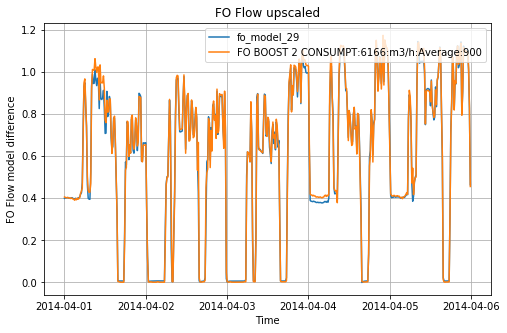

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
#plt.plot(m_linear.predict(X)[100:400],label=' linear predict ')
#plt.plot(m_tpot.predict(X)[100:400],label=' tpot predict ')

plt.plot(df_train['fo_model_29']['2014-04-01':'2014-04-05'])
plt.plot(df_train[d['fo_booster_24']]['2014-04':'2014-04-05'])

#plt.plot(y[100:400],label=' true ')

ax.grid()
ax.set(xlabel='Time', ylabel='FO Flow model difference',title='FO Flow upscaled')
#ax.set_ylim(-0.05,0.05)

plt.legend(loc='upper right')
#plt.xlim(pd.Timestamp(date1),pd.Timestamp(date2))
plt.show()
#fig.savefig(results_folder + date1 + "tpot_10gen_diff.png",dpi=1200)


In [23]:
r2_score(df_train['fo_model_29'],df_train[d['fo_booster_24']])

0.9921142945419256

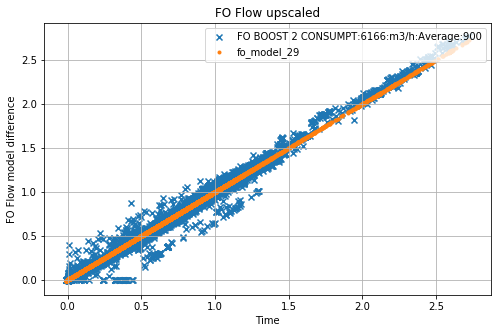

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
#plt.plot(m_linear.predict(X)[100:400],label=' linear predict ')
#plt.plot(m_tpot.predict(X)[100:400],label=' tpot predict ')

plt.scatter(df_train['fo_model_29']['2014'],df_train[d['fo_booster_24']]['2014'],marker='x')
plt.scatter(df_train['fo_model_29']['2014'],df_train['fo_model_29']['2014'],marker='.')



#plt.plot(y[100:400],label=' true ')

ax.grid()
ax.set(xlabel='Time', ylabel='FO Flow model difference',title='FO Flow upscaled')
#ax.set_ylim(-0.05,0.05)

plt.legend(loc='upper right')
#plt.xlim(pd.Timestamp(date1),pd.Timestamp(date2))
plt.show()
#fig.savefig(results_folder + date1 + "tpot_10gen_diff.png",dpi=1200)


In [31]:
import seaborn as sns
from scipy import stats, integrate

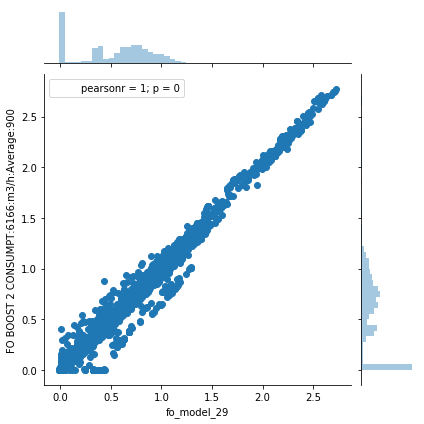

In [33]:
sns.jointplot(x='fo_model_29',y=d['fo_booster_24'],data=df_train)

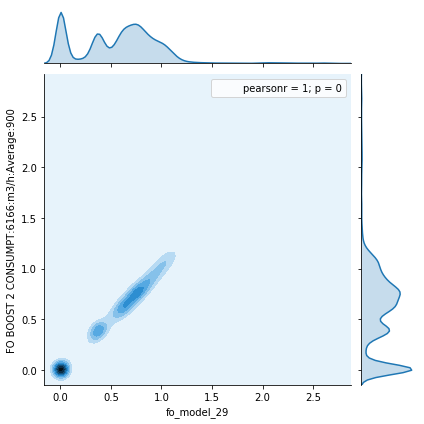

In [34]:
sns.jointplot(x='fo_model_29',y=d['fo_booster_24'],data=df_train, kind='kde')

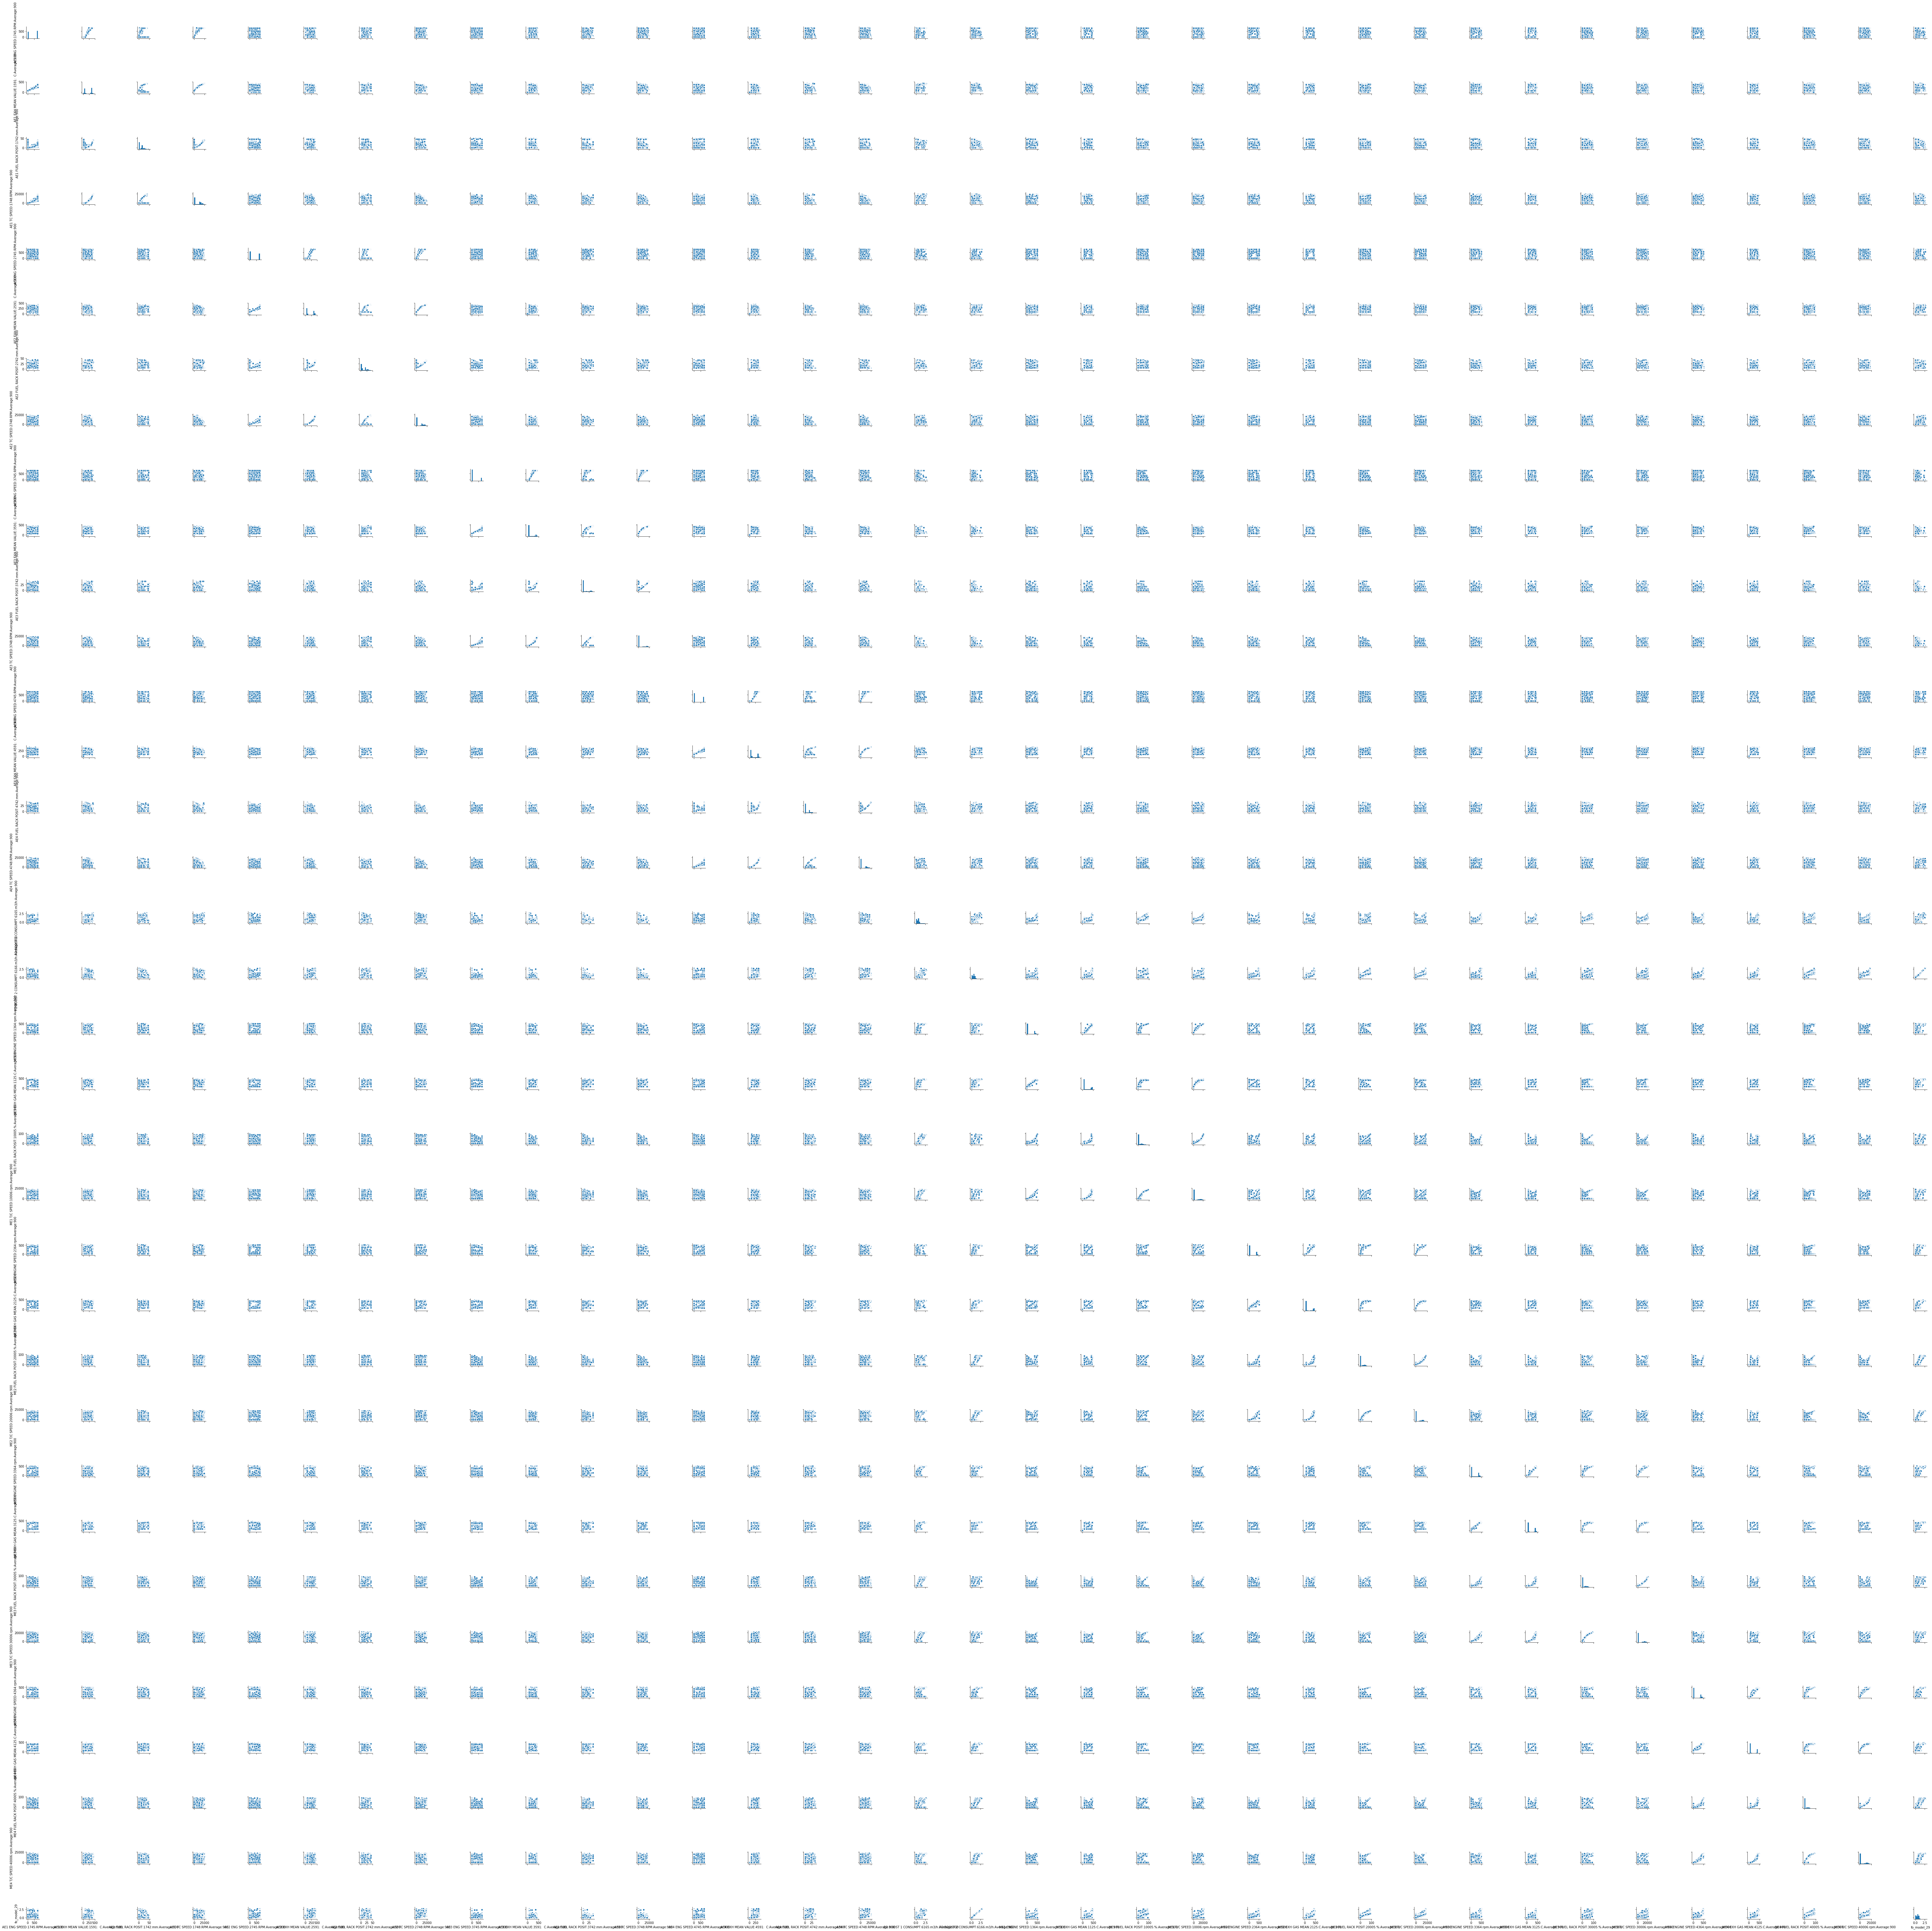

In [35]:
sns.pairplot(df_train)

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
#plt.plot(m_linear.predict(X)[100:400],label=' linear predict ')
plt.plot(m_tpot.predict(X)[100:400],label=' tpot predict ')


plt.plot(y[100:400],label=' true ')

ax.grid()
ax.set(xlabel='Time', ylabel='FO Flow model difference',title='FO Flow upscaled')
#ax.set_ylim(-0.05,0.05)

plt.legend(loc='upper right')
#plt.xlim(pd.Timestamp(date1),pd.Timestamp(date2))
plt.show()
fig.savefig(results_folder + date1 + "tpot_10gen_diff.png",dpi=1200)

In [ ]:
#_1_3 is the mass flow meters, in tonnes for each day.

fo_total = pd.DataFrame(df[['FO_day_engine_1_3','FO_day_engine_2_4']].dropna())


In [ ]:
fo_total

In [ ]:
df_test = df_train[test_features[test_no]]
list(df_test)


In [ ]:
df_test_day_av = df_test.resample('1D').mean()

In [ ]:
df_test_day_av

In [ ]:
X = np.array(df_test_day_av.drop(d['fo_booster_24'],axis=1))

In [ ]:
y = np.array(fo_total['FO_day_engine_2_4']/24/4) # mass flow per day in m3 per 15min

In [ ]:

# Train a model with the data from the resampled dataset.

from sklearn.externals import joblib
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

df_out = pd.DataFrame()

cores = -1
seed = 42
test_no = 29
gen = 10


print(test_features[test_no])

X = np.array(df_test_day_av.drop(d['fo_booster_24'],axis=1))
y = np.array(fo_total['FO_day_engine_2_4']*15/60) # mass flow per day in m3 per 15min


# make a test and train split.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=seed)

# 

print('Test number, linear model: ', test_no, '\n')
m_linear = sk.linear_model.LinearRegression(n_jobs=cores)
m_linear.fit(X_train, y_train.reshape(-1,))

m_tpot = TPOTRegressor(generations=gen, population_size=50, verbosity=2, n_jobs=cores)
m_tpot.fit(X_train, y_train.reshape(-1,))

df_out['tpot_test_no_'+str(test_no)] = m_tpot.predict(X)
    
MSE = mean_squared_error(m_tpot.predict(X_test),y_test)
MSE_perc = mean_squared_error(m_tpot.predict(X_test),y_test)/max(y_test)
R_2 = r2_score(m_tpot.predict(X_test),y_test)

print('MSE: ',MSE )
print('MSE %: ',MSE_perc )
print('R2 score:', R_2)

df_out['linear_test_no_'+str(test_no)] = m_linear.predict(X)

score = m_linear.score(X_test,y_test)
score_perc = m_linear.score(X_test,y_test)/max(y_test)
print('Score: ',score )
print('Score in % of max: ',score_perc )


In [ ]:
# Lets try the model!

In [ ]:

# drop the last column, which is the measured
X = np.array(df_test.drop(df_test.columns[len(df_test.columns)-1],axis=1))
# y is the measured value
y = np.array(df_test[df_test.columns[len(df_test.columns)-1]])

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
#plt.plot(m_linear.predict(X)[100:400],label=' linear predict ')
plt.plot(m_tpot.predict(X)[100:400]/4,label=' tpot predict ')

plt.plot(y[100:400],label=' true ')

ax.grid()
ax.set(xlabel='Time', ylabel='FO Flow model difference',title='FO Flow upscaled')
#ax.set_ylim(-0.05,0.05)

plt.legend(loc='upper right')
#plt.xlim(pd.Timestamp(date1),pd.Timestamp(date2))
plt.show()
fig.savefig(results_folder + date1 + "massflowmeters_tpot_10gen_diff.png",dpi=1200)

In [ ]:
(fo_total['FO_day_engine_2_4']*4)/df[d['fo_booster_24']].resample('1D').sum()['2014-02-01':'2014-12-16']

In [ ]:
df[d['fo_booster_24']].resample('1D').sum()['2014-02-01':'2014-12-16']